## Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.shape

(200, 4)

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [31]:
corr=df.corr()

(array([[2., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.]]),
 array([0.05480866, 0.1493278 , 0.24384693, 0.33836607, 0.4328852 ,
        0.52740433, 0.62192347, 0.7164426 , 0.81096173, 0.90548087,
        1.        ]),
 <a list of 4 BarContainer objects>)

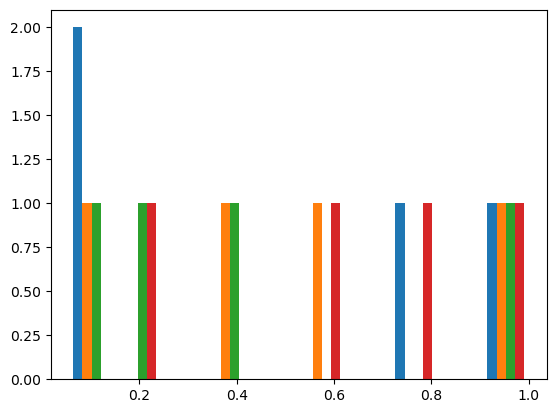

In [18]:
plt.hist(df.corr())

<AxesSubplot:xlabel='Sales', ylabel='TV'>

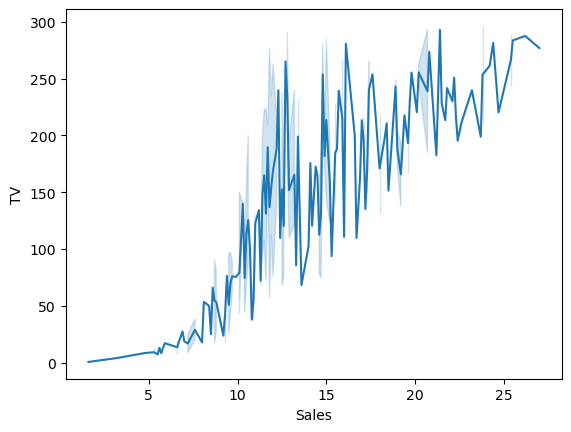

In [25]:
sns.lineplot(x=df['Sales'], y=df['TV'])

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

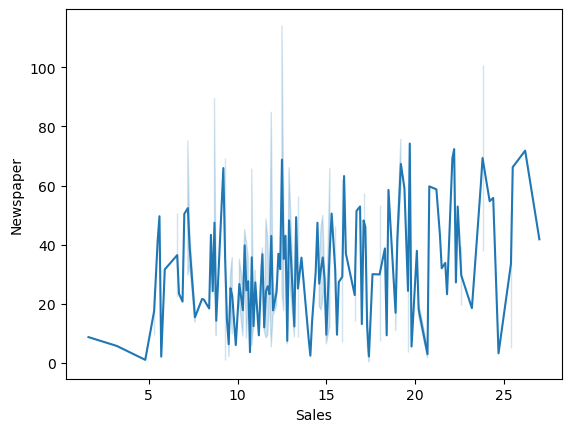

In [29]:
sns.lineplot(x=df['Sales'], y=df['Newspaper'])

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

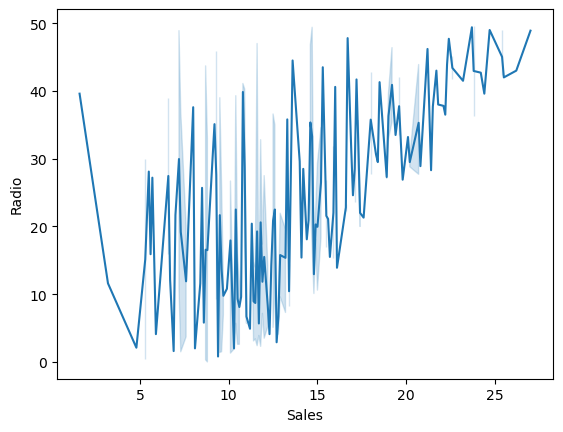

In [30]:
sns.lineplot(x=df['Sales'], y=df['Radio'])

In [36]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [37]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [39]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.model_selection import train_test_split

In [41]:
lr=LinearRegression()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40, random_state=42)

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
model=lr.predict(x_test)

In [46]:
model

array([16.63902413, 21.27548678, 21.72174077, 10.8164995 , 22.22714832,
       13.35087848, 21.26296358,  7.28718173, 13.35732452, 15.18037868,
        8.89761565,  6.49138646, 14.51326935,  8.83867006,  9.49159091,
       12.07490644,  8.84018706, 16.20182611, 10.27027547, 18.79536766,
       19.93298024, 13.8642087 , 12.38785643, 21.71127111,  7.53457962,
        5.56500602, 20.99254849, 11.80311964,  9.06161794,  8.37526001,
       12.25279138,  9.91469854, 21.830671  , 12.77700019, 18.26337691,
       20.13197086, 14.15091605, 21.11947555, 10.80927512,  4.31197375,
        9.51753508, 12.4319186 , 10.11635773,  8.0371654 , 13.2521022 ,
        5.15028895,  9.27682376, 14.10374127,  8.70521481, 11.60297218,
       15.67617324, 11.6638007 , 13.31758548, 11.08435278,  6.29895342,
        9.7925166 ,  9.3626635 , 24.42448277,  7.59664858, 12.20187455,
       17.5088018 , 15.24169083, 11.4355623 , 11.17957067, 16.52433204,
        6.81935356, 21.28044036,  6.02341036,  9.66588589, 11.55

In [57]:
lr.score(x_test,y_test)

0.864341606388241

In [51]:
check_sales=pd.DataFrame([[230.1, 37.8, 69.2]], columns=['TV', 'Radio', 'Newspaper'])

In [52]:
lr.predict(check_sales)

array([21.0086137])

In [54]:
## checking accuracy again:
from sklearn.metrics import r2_score
# Make predictions using the linear regression model
y_pred = lr.predict(x_test)

# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared Score:", r_squared)


R-squared Score: 0.864341606388241


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_random_state = None
max_r2_score = -float('inf')  # Initialize with negative infinity to ensure any score is an improvement

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    model_prediction = lr.predict(x_test)
    
    # Calculate the R-squared score for the current random_state
    r2 = r2_score(y_test, model_prediction)
    
    # Check if the current R-squared score is the highest so far
    if r2 > max_r2_score:
        max_r2_score = r2
        best_random_state = i

print("Best random_state:", best_random_state)
print("Max R-squared Score:", max_r2_score)


Best random_state: 92
Max R-squared Score: 0.9519707195109459
